# Data Cleaning

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Set the working directory & Read the data
os.chdir("C:\\Sunder\\DataScience\\MachineLearning\\Projects\\DataAnalytics\\FinancialInvestment")

In [3]:
# Read the .csv files
rounds = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")


In [4]:
# Number of records in rounds
print(rounds.shape)

(114949, 6)


In [5]:
# Number of records in companies
print(companies.shape)

(66368, 10)


In [6]:
# Column information of rounds
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


There are null values in **funding_round_code** and **raised_amount_usd** columns       

In [7]:
# Column information for companies
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [8]:
# identify the unique number of permalinks in companies which could be the unique key (Primary key) for each record
len(companies.permalink.unique())

66368

In [9]:
# converting all permalinks to lowercase
companies['permalink'] = companies['permalink'].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


Let's check whether these permalink values are present in the rounds datafrme

In [10]:
# find the number of unique permalink values in the rounds dataframe
len(rounds.company_permalink.unique())

90247

There are more unique permalinks than 66368 which shows that they are either additional permalink data 
or they could be due to lowercase/uppercase combinations of a given permalink

In [11]:
# Convert permalink to lowercase
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
len(rounds.company_permalink.unique())

66370

In [12]:
# Identify the two extra permalinks in rounds
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


From above, it can be seen that there is some weird characters in the **company_permalink** field. We need to termine 
the character encoding while reading the .csv file 

In [14]:
import chardet

rawdata = open('rounds2.csv', 'rb').read()
result = chardet.detect(rawdata)
print(result['encoding'])

Windows-1254


WE will try with utf-8 encoding and then decode with ascii

In [15]:
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
...,...,...,...,...,...,...
110545,/organization/whodats-spaces,/funding-round/d5d6db3d1e6c54d71a63b3aa0c9278e6,seed,NaN,28-10-2014,30000.0
113839,/organization/zengame-,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [16]:
# Let's check for unique company_permalink in rounds df
len(rounds.company_permalink.unique())

66368

There are same number of unique companies in both round and companies df. We can check, 
if the encoding problem exists in the **companies** df 

In [17]:
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
...,...,...,...,...,...,...,...,...,...,...
63833,/organization/whodatâs-spaces,Whodatâs Spaces,NaN,Apps,operating,NaN,NaN,NaN,NaN,NaN
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [18]:
# Removing the special characters from **companies** df

companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [19]:
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


The data is now clean for these 2 dataframes and we shall write it out to a file before proceeding for further cleansing

In [20]:
# write rounds file
rounds.to_csv("rounds_clean.csv", sep=',', index=False)

# write companies file
companies.to_csv("companies_clean.csv", sep='\t', index=False)

# Data Cleaning (Part-2)

In [22]:
# read the new, decoded csv files
rounds = pd.read_csv("rounds_clean.csv", encoding = "ISO-8859-1")
companies = pd.read_csv("companies_clean.csv", sep="\t", encoding = "ISO-8859-1")

# Check for the unique permalink values
print("Companies in companies df ", len(companies.permalink.unique()))
print("Companies in rounds df ",len(rounds.company_permalink.unique()))

# Companies in rounds and not in companies df (Ideally should be zero)
print("Companies in rounds but not in companies df ", len(rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]))


Companies in companies df  66368
Companies in rounds df  66368
Companies in rounds but not in companies df  0


## Identifying Missing Values

In [23]:
# missing values in companies df
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [24]:
# missing values in rounds df
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [25]:
# We shall merge the two dataframes based on permalink and company_permalink
master = pd.merge(companies, rounds, how="inner", left_on="permalink", right_on="company_permalink")
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [26]:
# drop the duplicate column "company_permalink"
master =  master.drop(['company_permalink'], axis=1) 

In [28]:
# Identifying the null values in columns
master.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [29]:
# summing up the missing values (column-wise) and displaying percentage of NaNs 
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

The columns ```funding_round_code``` is useless (with about 73% missing values). 
Also, from the business objectives given, the columns ```homepage_url```, ```founded_at```, 
```state_code```, ```region``` and ```city``` need not be used and we shall drop these columns.

In [30]:
drop_columns = ['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city']
master = master.drop(drop_columns, axis=1)

In [31]:
master.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [32]:
# summing up the missing values (column-wise) and displaying percentage of NaNs for the remaining columns
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

- The column ```raised_amount_usd``` is an important column, since that is the number we want to analyse (compare, means, sum etc.). 
and hence this column needs to be carefully treated 
- The column ```country_code``` will be used for country-wise analysis, and 
- The column ```category_list``` will be used to merge the dataframe with the main categories.

Identifying the missing values in ```raised_amount_usd```.

In [33]:
# summary stats of raised_amount_usd
master['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

- The mean is somewhere around USD 10 million, while the median is only about USD 100m. 
- The min and max values are also quite wide apart (22 billion)
- Hence, we will not be able to impute and hence removing the NaN values

In [34]:
# removing NaNs in raised_amount_usd
master = master[~np.isnan(master['raised_amount_usd'])]
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [35]:
country_codes = master['country_code'].astype('category')

# displaying frequencies of each category
country_codes.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

Now, we can either delete the rows having country_code missing (about 6% rows), or we can impute them by USA. 
Since the number 6 is quite small, better to just remove the rows.

In [36]:
# removing rows with missing country_codes
master = master[~pd.isnull(master['country_code'])]

# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Since the category_list has only very small % of misisng values, we can remove those rows

In [37]:
# removing rows with missing category_list values
master = master[~pd.isnull(master['category_list'])]

# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [38]:
# Write the cleaned data frame to a .csv file
master.to_csv("master_df.csv", sep=',', index=False)

In [39]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88529 non-null  object 
 1   name                     88528 non-null  object 
 2   category_list            88529 non-null  object 
 3   status                   88529 non-null  object 
 4   country_code             88529 non-null  object 
 5   funding_round_permalink  88529 non-null  object 
 6   funding_round_type       88529 non-null  object 
 7   funded_at                88529 non-null  object 
 8   raised_amount_usd        88529 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [40]:
# Finding how many rows have been retained
100*(len(master.index) / len(rounds.index))

77.01589400516751

# Funding Type Analysis

We shall compare the funding amounts across the funding types. We would also need to impose the constraint that the investment amount should be between 5 and 15 million USD.
We will choose the funding type such that the average investment amount falls in this range.

In [43]:
master['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

Among the above funding types, we shall be considering only 4 of them (**venture**, **angel**, **seed**, **private_equity**)

In [44]:
df = master[(master.funding_round_type == "venture") | 
        (master.funding_round_type == "angel") | 
        (master.funding_round_type == "seed") | 
        (master.funding_round_type == "private_equity") ]

We have to compute a representative value of the funding amount for each type of invesstment. 
We can either choose the mean or the median - We shall take that call  after we have a look at the
distribution of **raised_amount_usd** to get a sense of the distribution of data.

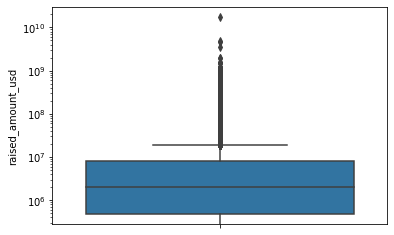

In [45]:
# distribution of raised_amount_usd
sns.boxplot(y=df['raised_amount_usd'])
plt.yscale('log')
plt.show()

There are few extreme values. We shall find the actual median and mean values through summary metrics

In [47]:
# Summary Metrics
df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

The mean is 9.5 million and the median is 2.0 million which is a significant difference. We shall check the 
mean and median for each individual **funding type**

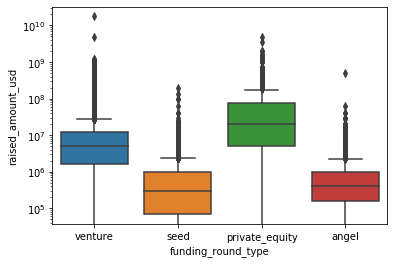

In [48]:
# comparing summary stats across four categories
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

In [49]:
# compare the mean and median values across categories
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

The mean and median for each funding_type is varying largely. For eg:- For **Private Equity**, the mean is 74 million 
and the median is 20 million. 

We shall go ahead for the **median** as the statistic, since there are many values which are extreme on the 
higher end thereby pulling up the mean

In [51]:
# compare the median investment amount across the types
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

Among the various funding types, only one of them, **Venture** falls in the range of 5 million to 15 million 
which is the need

## Country Analysis

We shall compare the total investment amounts across countries. We will filter the data for only the **venture** type investments and then compare the **total investment** across countries

In [53]:
# filter the df for private equity type investments
df = df[df.funding_round_type=="venture"]

# group by country codes and compare the total funding amounts
country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(country_wise_total)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64


We shall take the top 5 countries and in that we will filter out non-English speaking countries

In [54]:
top5countries = country_wise_total[:5]
top5countries

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
Name: raised_amount_usd, dtype: float64

Amongthe above, China is a non-English speaking country and hence, we shall consider the other top 3. 
They are **US**, **GBR** and **India**

In [55]:
# filtering for the top three countries
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='IND')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


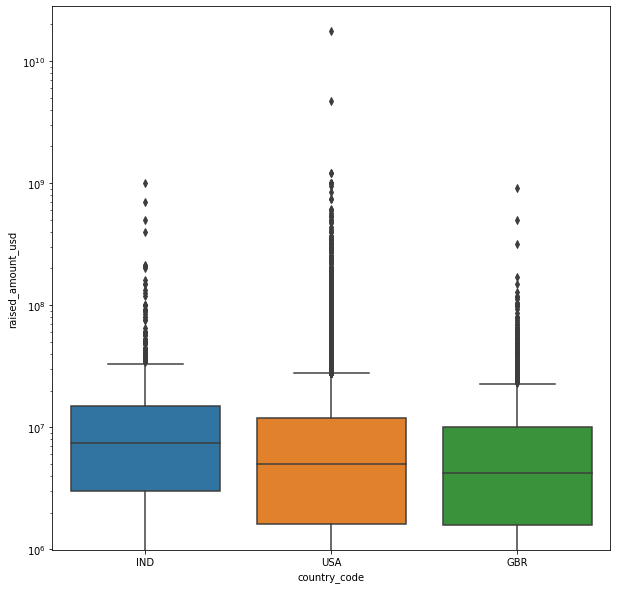

In [56]:
# boxplot to see distributions of funding amount across countries
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

## Sector Analysis

We need to extract the main sector using the column category_list. We shall create a new column "main category". As stated in the document, the first token before the seperator "|" shall be considered as the main category

In [58]:
# extracting the main category
df.loc[:, 'main_category'] = df['category_list'].apply(lambda x: x.split("|")[0])
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


In [59]:
# drop the category_list column
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
10,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
22,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


Now, we'll read the ```mapping.csv``` file and merge the main categories with its corresponding column. 

In [61]:
# read mapping file
mapping = pd.read_csv("mapping.csv", sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [62]:
# missing values in mapping file
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [63]:
# remove the row with missing values
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

Since we need to merge the mapping file with the main dataframe (df), We shall convert the common column to lowercase in both.

In [64]:
# converting common columns to lowercase
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

To be able to merge all the ```main_category``` values with the mapping file's ```category_list``` column, all the values in the  ```main_category``` column should be present in the ```category_list``` column of the mapping file.

In [65]:
# values in main_category column in df which are not in the category_list column in mapping file
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
10,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
11,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
12,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
61,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
198,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
...,...,...,...,...,...,...,...,...,...
114632,/organization/zoopla,Zoopla,ipo,GBR,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,property management
114660,/organization/zopa,Zopa,operating,GBR,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,finance
114661,/organization/zopa,Zopa,operating,GBR,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,finance
114663,/organization/zopa,Zopa,operating,GBR,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,finance


Ideally, the above value should have been zero. We shall look at the values which are present in the mapping file but not in the main dataframe df.

In [66]:
# values in the category_list column which are not in main_category column 
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,virtual workforces,0,0,0,1,0,0,0,0,0
672,waste ma0gement,0,0,1,0,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


From above we see that the value **analytics** is misspelled as **a0lytics**. Similary for alternative medicine also

In [67]:
# replacing '0' with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
print(mapping['category_list'])

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object


Once again check for missing values between df and mapping file (for categories)

In [129]:
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
28541,/organization/dolores-speech-products,Dolores Speech Products,operating,USA,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,250000.0,adaptive equipment
35278,/organization/fia-formula-e,FIA Formula E,closed,GBR,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,15-05-2014,68569234.0,racing
51816,/organization/justinmind,Justinmind,operating,USA,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,862000.0,rapidly expanding
88384,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,closed,USA,/funding-round/96f7fa1fdcc380649723c8effc2a1062,venture,01-08-2008,1100000.0,retirement
88385,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,closed,USA,/funding-round/c6baca436fa80360921d89a06a0a0e93,venture,01-05-2011,2000000.0,retirement
106150,/organization/velocomp,Velocomp,operating,USA,/funding-round/2cdceb89206aad240a78e58329cec171,venture,09-09-2011,1420000.0,adaptive equipment


We shall be dropping the above 6 records and proceed ahead with the rest of the records and merge the dataframes (df & mapping)

In [138]:
# merge the dfs
df = pd.merge(df, mapping, how='inner', left_on='main_category', right_on='category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0


In [139]:
# let's drop the category_list column since it is the same as main_category
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,0,0,0,1,0,0,0,0,0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38797 entries, 0 to 38796
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                38797 non-null  object 
 1   name                                     38797 non-null  object 
 2   status                                   38797 non-null  object 
 3   country_code                             38797 non-null  object 
 4   funding_round_permalink                  38797 non-null  object 
 5   funding_round_type                       38797 non-null  object 
 6   funded_at                                38797 non-null  object 
 7   raised_amount_usd                        38797 non-null  float64
 8   main_category                            38797 non-null  object 
 9   Automotive & Sports                      38797 non-null  int64  
 10  Blanks                                   38797

WE shall now merge the last 9 columns to a single column "Sub Category"

In [141]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = df.columns[9:18]

# take the setdiff() to get the rest of the variables
id_vars = np.setdiff1d(df.columns, value_vars)

print(value_vars, "\n")
print(id_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [142]:
# convert into long
long_df = pd.melt(df, 
        id_vars=list(id_vars), 
        value_vars=list(value_vars))

long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,media,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,media,90min,/organization/90min,15000000.0,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,media,90min,/organization/90min,5800000.0,operating,Automotive & Sports,0
3,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,media,90min,/organization/90min,18000000.0,operating,Automotive & Sports,0
4,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,media,All Def Digital,/organization/all-def-digital,5000000.0,operating,Automotive & Sports,0


Since the value of "0" is not useful for us, we shll only use those rows where the value is "1".
Latter we shll drop the value column 

In [143]:
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [144]:
len(long_df)

38797

In [145]:
# renaming the 'variable' column
long_df = long_df.rename(columns={'variable': 'sector'})

The dataframe now contains only venture type investments in countries USA, IND and GBR, and 
we have mapped each company to one of the eight main sectors (named 'sector' in the dataframe). 

We can now compute the sector-wise number and the amount of investment in the three countries.

In [146]:
# We are interested only for investment range between 5 and 15m. Hence filtering for them
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]

In [147]:
# groupby country, sector and compute the count and sum
df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2351  2.164292e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


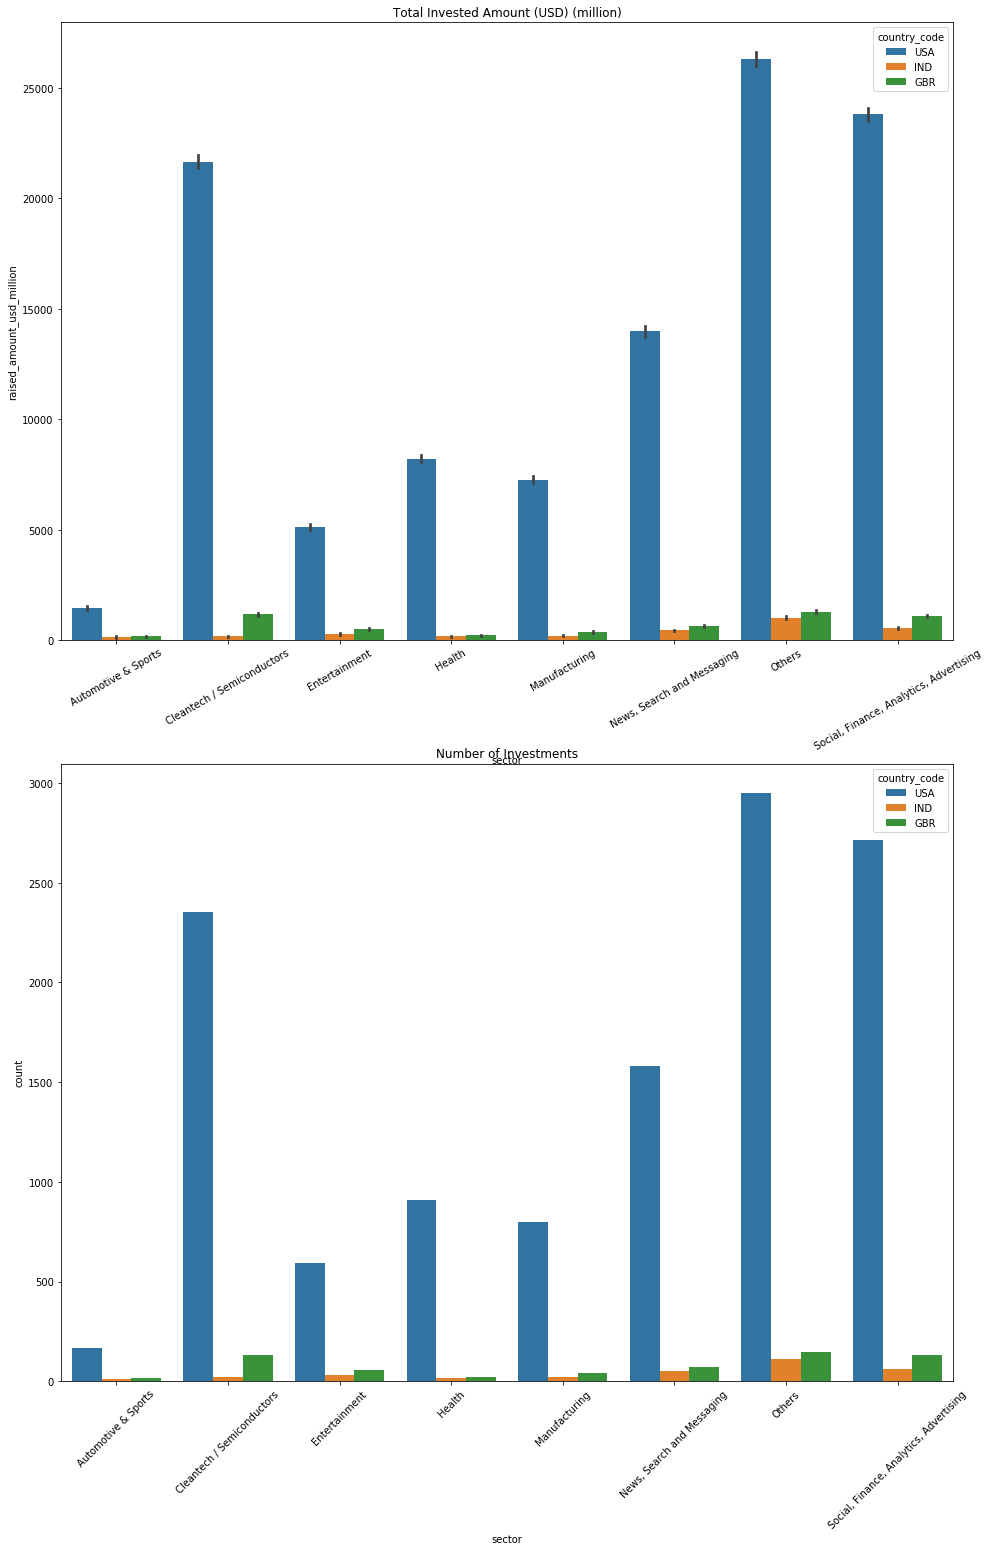

In [155]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 25))

plt.subplot(2, 1, 1)
df['raised_amount_usd_million'] = df['raised_amount_usd'].div(1000000)
p = sns.barplot(x='sector', y='raised_amount_usd_million', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD) (million)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=45)
plt.title('Number of Investments')


plt.show()

Thus, the top country in terms of the number of investments (and the total amount invested) is the USA. 
The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.

In case you don't want to consider 'Others' as a sector, 'News, Search and Messaging' is the next best sector.

## Rough Work Area

In [136]:
mapping[mapping['category_list'].str.contains("rac")]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
346,human computer interaction,0,0,0,0,0,0,0,1,0
648,tracking,0,0,0,0,0,0,0,1,0


In [127]:
mapping.loc[(mapping.category_list == 'enterprise 2.na'),'category_list']='enterprise 2.0'


In [128]:
df.loc[(df.main_category == 'specialty retail'),'main_category'] = 'custom retail'